TAREA SEMANA 3 : FUNDAMENTOS DE PYTHON
Nombre : Ivan Ozono

Ejercicio 1

Escribir dos funciones que simulan una calculadora científica que permita calcular el seno, coseno, tangente, exponencial y logaritmo neperiano o natural (logaritmo en base euler). 

1 - La función uno preguntará al usuario el intervalo donde quiere aplicar la función matemática y la función a aplicar, y mostrará por pantalla una tabla donde la primera columna será los valores del intervalo dado (x) y la columna 2 tendrá los resultados de el resultado de aplicar la función a este intervalo (y).

2 - La función dos graficara con matplotlib el resultado de función anterior y la mostrará en pantalla. Recuerden poner los títulos ejes y demás configuraciones de las gráficas para que queden de la mejor manera posible.


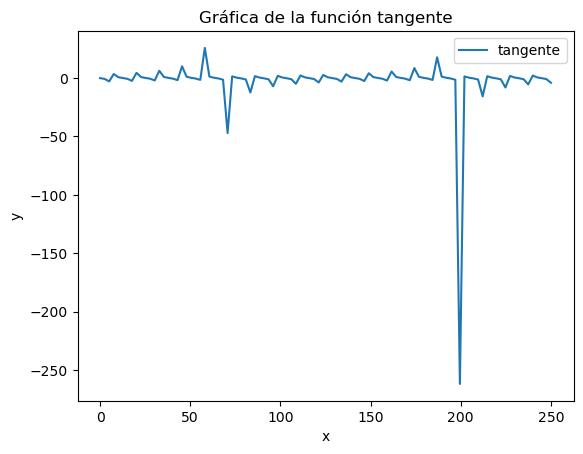

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Función para calcular los valores de la función
def calcular_funcion(intervalo, funcion):
    # Se utiliza la función linspace de Numpy para generar un arreglo con valores igualmente espaciados en el intervalo dado por el usuario.
    x = np.linspace(intervalo[0], intervalo[1], 100)  # Crear 100 valores en el intervalo dado
    if funcion == 'seno':
        y = np.sin(x)
    elif funcion == 'coseno':
        y = np.cos(x)
    elif funcion == 'tangente':
        y = np.tan(x)
    elif funcion == 'exponencial':
        y = np.exp(x)
    elif funcion == 'logaritmo':
        y = np.log(x)
    else:
        print('Función no válida')
        return None
    tabla = pd.DataFrame({'x': x, 'y': y})  # Crear tabla con valores de x , y
    return tabla

# Función para graficar la tabla de valores de la función
def graficar_funcion(tabla, funcion):
    plt.plot(tabla['x'], tabla['y'], label=funcion)  # Graficar la función
    plt.xlabel('x')  # Configurar etiqueta del eje x
    plt.ylabel('y')  # Configurar etiqueta del eje y
    plt.title('Gráfica de la función ' + funcion)  # Configurar título de la gráfica
    plt.legend()  # Configurar leyenda de la gráfica
    plt.show()  # Mostrar la gráfica

intervalo_inicio = float(input("Escribe el numero del intervalo inicial: "))
intervalo_final = float(input("Escribe el numero del intervalo final: "))
funcion = input(" Teclea la funcion deseada (seno , coseno, tangente, exponencial o logaritmo): ")
tabla_funcion = calcular_funcion([intervalo_inicio, intervalo_final], funcion)
tabla_funcion

graficar_funcion(tabla_funcion, funcion)


EXPLICACION: Me gusto mucho este ejercicio para practicar las librerias Numpy, Pandas y Matplotlib, muy interesante. Especialmente la función linspace de Numpy para generar un arreglo con valores igualmente espaciados

Ejercicio 2

Escribir un programa para ver los beneficios de una empresa en un periodo de años.

El programa debe cumplir los siguientes requisitos:

El programa tiene que preguntar al usuario por un año inicial y otro final, y después preguntar por los ingresos y egresos de cada año desde el año inicial hasta el año final.

Debe garantizar que por lo menos haya 5 años entre el año inicial y el final.

Con los datos introducidos se deben crear un dataframe, con las columnas fecha, ingresos y egresos.
El programa debe generar otra columna con el beneficio de cada año (ingresos menos egresos) y mostrarla por pantalla.

El programa debe crear otra columna llamada ganancia la cuál indique para cada año si ha habido beneficios o no de manera booleana y mostrarla por pantalla.

Finalmente el programa debe mostrar por pantalla la lista de los años con pérdidas.


In [1]:
# Importar la librería pandas
import pandas as pd

# Preguntar al usuario por los años inicial y final
while True:
    try:
        year_start = int(input("Introduce el año inicial (mayor o igual a 2000): "))
        year_end = int(input("Introduce el año final (menor o igual al año actual y al menos 5 años después del año inicial): "))
        if year_start < 2000 or year_end > pd.Timestamp.now().year or year_end < year_start + 5:
            raise ValueError
        break
    except ValueError:
        print("Por favor, introduce un año inicial mayor o igual a 2000 y un año final menor o igual al año actual y al menos 5 años después del año inicial.")

# Crear una lista con los años del rango introducido por el usuario
years = range(year_start, year_end+1)

# Crear un diccionario vacío para almacenar los datos de ingresos y egresos de cada año
data = {'Fecha': [], 'Ingresos': [], 'Egresos': []}

# Pedir al usuario los ingresos y egresos de cada año y guardarlos en el diccionario
for year in years:
    while True:
        try:
            ingresos = float(input(f"Introduce los ingresos del año {year}: "))
            egresos = float(input(f"Introduce los egresos del año {year}: "))
            break
        except ValueError:
            print("Por favor, introduce un número válido.")
    data['Fecha'].append(str(year))
    data['Ingresos'].append(ingresos)
    data['Egresos'].append(egresos)

# Crear un DataFrame a partir del diccionario de datos
df = pd.DataFrame(data)

# Calcular la columna de beneficios
df['Beneficio'] = df['Ingresos'] - df['Egresos']

# Mostrar el DataFrame con los beneficios
print("Beneficios:")
print(df[['Fecha', 'Beneficio']])

# Calcular la columna de ganancias
df['Ganancia'] = df['Beneficio'] > 0

# Mostrar el DataFrame con las ganancias
print("Ganancias:")
print(df[['Fecha', 'Ganancia']])

# Mostrar los años con pérdidas
print("Años con pérdidas:")
print(df.loc[df['Beneficio'] < 0, 'Fecha'].tolist())


Beneficios:
  Fecha  Beneficio
0  2015      -20.0
1  2016      191.0
2  2017     -309.0
3  2018       99.0
4  2019     -198.0
5  2020      202.0
Ganancias:
  Fecha  Ganancia
0  2015     False
1  2016      True
2  2017     False
3  2018      True
4  2019     False
5  2020      True
Años con pérdidas:
['2015', '2017', '2019']


EXPLICACION : No tuve problemas con este ejercicio, me ayudo a reforzar el tema de DataFrames en Pandas, algo que ayuda es relizarnarlo con las tablas y consultas en SQL , pues estoy mas familiarizado con ello.




Ejercicio 3

El fichero horas-trabajo.csv contiene el número de horas mensuales trabajadas por los empleados de una empresa durante el primer cuatrimestre. Crear un programa que realice las siguientes operaciones utilizando la librería Pandas:

Crea una columna con el número total de horas trabajadas para cada operador.

Muestra cual es el promedio de horas trabajadas en total en la empresa durante el mes Marzo

Muestra cuántos operadores hay por cada departamento de la empresa.

Muestra el número de empleados que han trabajado todos los meses, es decir, que tienen un número de horas todos los meses del cuatrimestre.


In [18]:
import pandas as pd

# Leer el archivo csv
df = pd.read_csv('horas-trabajo.csv')

# Crear una columna con el número total de horas trabajadas para cada operador
df['Total horas'] = df.sum(axis=1, numeric_only=True)

# Mostrar el data frame con la nueva columna
print(df)
print("------------------------------")

# Mostrar el promedio de horas trabajadas en total en la empresa durante el mes de Marzo
promedio_marzo = df['Marzo'].mean()
print('El promedio de horas trabajadas en marzo es:', promedio_marzo)
print("------------------------------")
# Mostrar cuántos operadores hay por cada departamento de la empresa
operadores_por_departamento = df.groupby('Departamento').count()['Id']
print('Operadores por departamento:\n', operadores_por_departamento)
print("------------------------------")

#  número de empleados que han trabajado todos los meses del cuatrimestre
empleados_todos_meses = len(df.dropna())

print('El número de empleados con horas completas es:', empleados_todos_meses )


     Id Departamento  Enero  Febrero  Marzo  Abril  Total horas
0   OP1  Proveedores    180    160.0  140.0  180.0        660.0
1   OP2       Ventas    120    140.0    NaN  100.0        360.0
2   OP3       Ventas     80     90.0   80.0   80.0        330.0
3   OP5           IT    180    170.0  180.0  180.0        710.0
4   OP6    Marketing    100      NaN  100.0    NaN        200.0
5   OP7       Ventas    160    160.0  160.0  160.0        640.0
6   OP8  Proveedores    100     80.0  110.0   80.0        370.0
7   OP9           IT     80     80.0   80.0   80.0        320.0
8  OP10       Ventas    180    160.0  180.0  180.0        700.0
------------------------------
El promedio de horas trabajadas en marzo es: 128.75
------------------------------
Operadores por departamento:
 Departamento
IT             2
Marketing      1
Proveedores    2
Ventas         4
Name: Id, dtype: int64
------------------------------
El número de empleados con horas completas es: 7


EXPLICACION: Este ejercicio se me dificulto porque no recordaba el metodo .dropna(), que vimos en clase. Estuve buscando una solucion con espacios en blanco (''), pero me di cuenta que se manejan diferentes los valore 'NaN' o un espacio en blanco ('').  Tambien realice la investigacion para crear una columna con el número total de horas trabajadas para cada operador. La nueva columna se crea sumando todas lasd filas de las columnas de la tercera posicion en adelante (por eso se usa iloc [:,2:], que significa todas las filas de la tercera en adelante)

Ejercicio 4

Crear un programa utilizando la librería Pandas y Matplotlib que realice lo siguiente:

Crear el siguiente DataFrame indexado:

Dia     Calorias    Tiempo
Lunes   420         60
Martes  380         40
Miercoles 390       75
Jueves  490         55
Viernes  300        45


Calcular la media, mediana y desviación típica de ambas columnas.

Añadir otra columna booleana al DataFrame para ver si se ha cumplido el reto de quemar más de 400 calorías por hora. 

La nueva columna debe generarse aplicando una fórmula a las otras columnas.

Filtrar el DataFrame y devolver otro DataFrame con las filas pares que cumplan que el número de calorías es mayor de 400.

Añadir otra columna con los porcentajes de días que se ha conseguido el reto y los que no.

Crear un gráfico donde se  muestre la progresión de las calorías y tiempo durante la semana.



         Dia  Calorias  Tiempo
0      Lunes       420      60
1     Martes       380      40
2  Miercoles       390      75
3     Jueves       490      55
4    Viernes       300      45
----------------------------------
La media de las Calorias es :  396.0
La mediana de las Calorias es :  390.0
La desviacion estandar  de las Calorias es :  68.7749954561976
La media del Tiempo es :  55.0
La mediana del Tiempo  es :  55.0
La desviacion estandar del Tiempo es :  13.693063937629153
----------------------------------
         Dia  Calorias  Tiempo  Cumplido
0      Lunes       420      60      True
1     Martes       380      40      True
2  Miercoles       390      75     False
3     Jueves       490      55      True
4    Viernes       300      45     False
----------------------------------
Filas pares que cumplieron el reto: 
       Dia  Calorias  Tiempo  Cumplido
0  Lunes       420      60      True
----------------------------------
   cumplido  no_cumplido
0      60.0         40.0
--

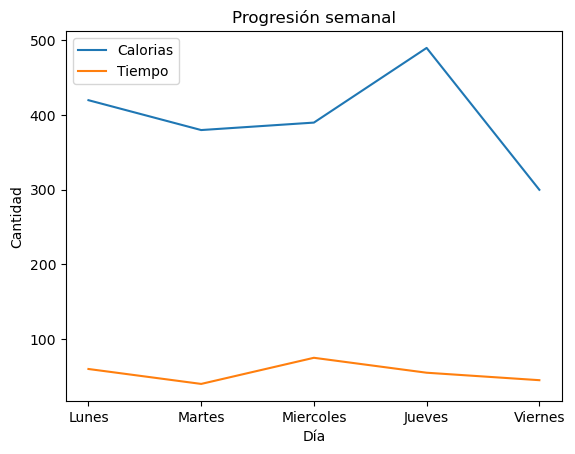

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear DataFrame
df = pd.DataFrame({
    'Dia': ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes'],
    'Calorias': [420, 380, 390, 490, 300],
    'Tiempo': [60, 40, 75, 55, 45]
})
print(df)
print('----------------------------------')

# Calcular estadísticas
calorias_mean = df['Calorias'].mean()
calorias_median = df['Calorias'].median()
calorias_std = df['Calorias'].std()
tiempo_mean = df['Tiempo'].mean()
tiempo_median = df['Tiempo'].median()
tiempo_std = df['Tiempo'].std()
print('La media de las Calorias es : ', calorias_mean)
print('La mediana de las Calorias es : ', calorias_median)
print('La desviacion estandar  de las Calorias es : ', calorias_std)
print('La media del Tiempo es : ', tiempo_mean)
print('La mediana del Tiempo  es : ', tiempo_median)
print('La desviacion estandar del Tiempo es : ', tiempo_std)
print('----------------------------------')
# Añadir columna booleana
df['Cumplido'] = (df['Calorias'] / (df['Tiempo'] / 60)) > 400

print(df)
print('----------------------------------')

# Filtrar DataFrame y calcular porcentaje
filt_df = df.loc[df.index % 2 == 0]  # Seleccionar filas pares
filt_df = filt_df.loc[filt_df['Calorias'] > 400]  # Seleccionar calorias > 400
print('Filas pares que cumplieron el reto: \n ' ,filt_df)
print('----------------------------------')

# Filtrar DataFrame  con los porcentajes de días que se ha conseguido el reto y los que no.
pct_cumplido = df['Cumplido'].mean() * 100
no_cumplido_pct = 100 - pct_cumplido

df_pct = pd.DataFrame({
    'cumplido': [pct_cumplido],
    'no_cumplido': [no_cumplido_pct]
})
print(df_pct)
print('----------------------------------')



# Crear gráfico
plt.plot(df['Dia'], df['Calorias'], label='Calorias')
plt.plot(df['Dia'], df['Tiempo'], label='Tiempo')
plt.legend()
plt.title('Progresión semanal')
plt.xlabel('Día')
plt.ylabel('Cantidad')
plt.show()



EXPLICACION: Tuve problemas con el punto de Añadir otra columna con los porcentajes de días que se ha conseguido el reto y los que no. Debido a que en la dataframe que estaba manejando tenia una estuctura diferente para agregar esos datos. La solucion fue filtar primero y despues generar nuevo dataFrame

Ejercicio 5

El fichero coches.csv contiene información sobre los modelos de coches vendidos en USA durante un determinado año. Se pide:

Crear un DataFrame a partir del fichero anterior.

Eliminar las filas con valores desconocidos y mostrar el número de filas del DataFrame resultante.

Crear una columna con el precio en euros (cambio 1$ = 0.94€)

Mostrar las 10 últimas filas del DataFrame.

Mostrar el número de marcas de coches que contiene el DataFrame.

Mostrar el número de modelos de cada marca que hay en el DataFrame, de mayor a menor frecuencia.

Mostrar cuál es la marca y el modelo del coche más caro.

Mostrar el precio medio en euros de los coches agrupando por marca y ordenando de menor a mayor precio.

Gráfica el diagrama de barras del porcentaje de modelos de cada marca.

Gráfica el diagrama de dispersión de la potencia y el precio.


Número de filas: 421
__________________________________________________
     Marca                   Modelo   Tipo  Potencia  Precio  Precio_euros
418  Volvo              S60 2.5 4dr  Sedan     208.0   29916      28121.04
419  Volvo               S60 T5 4dr  Sedan     247.0   32902      30927.88
420  Volvo                S60 R 4dr  Sedan     300.0   35382      33259.08
421  Volvo              S80 2.9 4dr  Sedan     208.0   35542      33409.48
422  Volvo             S80 2.5T 4dr  Sedan     194.0   35688      33546.72
423  Volvo  C70 LPT convertible 2dr  Sedan     197.0   38203      35910.82
424  Volvo  C70 HPT convertible 2dr  Sedan     242.0   40083      37678.02
425  Volvo               S80 T6 4dr  Sedan     268.0   42573      40018.62
426  Volvo                      V40  Wagon     170.0   24641      23162.54
427  Volvo                     XC70  Wagon     208.0   33112      31125.28
__________________________________________________
Número de marcas: 38
_______________________________

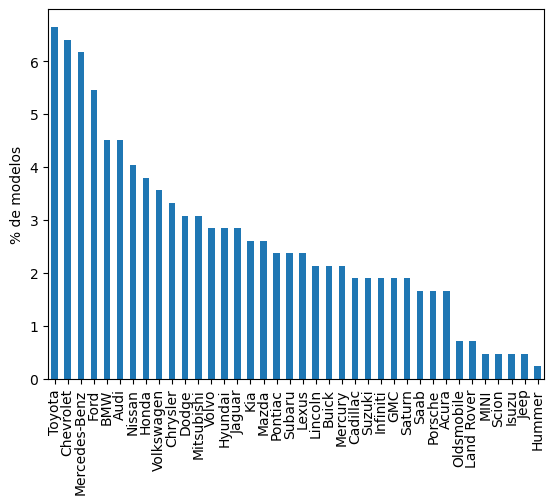

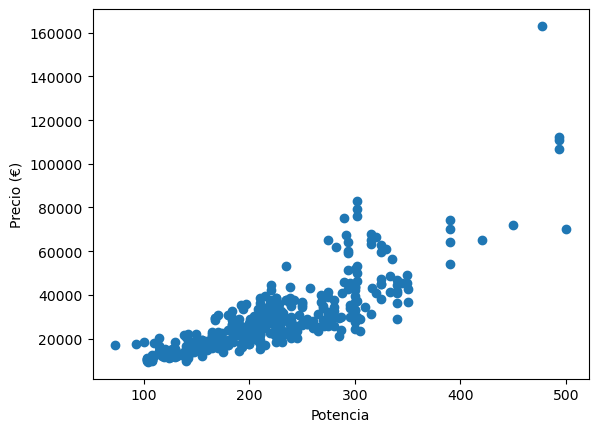

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo
df = pd.read_csv('coches.csv')

# Eliminar las filas con valores desconocidos
df = df.dropna()

# Mostrar el número de filas del DataFrame resultante
print(f'Número de filas: {len(df)}')
print('_' * 50)

# Crear una columna con el precio en euros (cambio 1$ = 0.94€)
df['Precio_euros'] = df['Precio'] * 0.94


# Mostrar las 10 últimas filas del DataFrame
print(df.tail(10))
print('_' * 50)

# Mostrar el número de marcas de coches que contiene el DataFrame
print(f'Número de marcas: {len(df.Marca.unique())}')
print('_' * 50)

# Mostrar el número de modelos de cada marca que hay en el DataFrame, de mayor a menor frecuencia
print(df.groupby('Marca').Modelo.nunique().sort_values(ascending=False))
print('_' * 50)

# Mostrar cuál es la marca y el modelo del coche más caro
caro = df.loc[df.Precio.idxmax()]
print(f'Coche más caro: {caro.Marca} {caro.Modelo}')
print('_' * 50)

# Mostrar el precio medio en euros de los coches agrupando por marca y ordenando de menor a mayor precio
precios_medios = df.groupby('Marca').Precio_euros.mean().sort_values()
print(precios_medios)
print('_' * 50)

# Gráfica el diagrama de barras del porcentaje de modelos de cada marca
porcentajes = df.Marca.value_counts(normalize=True) * 100
porcentajes.plot(kind='bar')
plt.ylabel('% de modelos')
plt.show()

# Gráfica el diagrama de dispersión de la potencia y el precio
plt.scatter(df.Potencia, df.Precio_euros)
plt.xlabel('Potencia')
plt.ylabel('Precio (€)')
plt.show()


EXPLICACION: No tuve muchos problemas para realizar este ejercicio, fue bueno recordar como  gráficar el porcentaje de modelos de cada marca y el diagrama de dispersión de la potencia y el precio.